In [1]:
import os
os.chdir('/home/ekhongl/Codes/DL - Topic Modelling')

from __future__ import print_function, division
import sys
import timeit
from six.moves import cPickle as pickle

import numpy as np
import pandas as pd

import theano
import theano.tensor as T

from lib.deeplearning import autoencoder

Using gpu device 0: Tesla K40c (CNMeM is disabled, cuDNN 5105)
/home/ekhongl/.conda/envs/py3/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
dat_x = np.genfromtxt('data/dtm_20news.csv', dtype='float32', delimiter=',', skip_header = 1)
dat_y = dat_x[:,0]
dat_x = dat_x[:,1:]
vocab =  np.genfromtxt('data/dtm_20news.csv', dtype=str, delimiter=',', max_rows = 1)[1:]
test_input = theano.shared(dat_x)

## Loading weights pretrained from the deepbeliefnet to the autoencoder

In [3]:
model = autoencoder( architecture = [2756, 500, 500, 128], opt_epochs = [900,5,10], model_src = 'params/dbn_params')

Building layer: 0
   Input units: 2756
  Output units: 500
Building layer: 1
   Input units: 500
  Output units: 500
Building layer: 2
   Input units: 500
  Output units: 128


## Training the Autoencoder

In [ ]:
model.train(test_input, batch_size = 100, epochs = 110, add_noise = 16, output_path = 'params/to_delete')

... getting the finetuning functions
... finetuning the model


## Loading the trained Auto-Encoder

In [4]:
model = autoencoder( architecture = [2000, 500, 500, 128], model_src = 'params_2000/ae_train',  param_type = 'ae')

Building layer: 0
   Input units: 2000
  Output units: 500
Building layer: 1
   Input units: 500
  Output units: 500
Building layer: 2
   Input units: 500
  Output units: 128
Loading the trained auto-encoder parameters.
...please ensure that the auto-encoder params matches the defined architecture.


## Extracting features from the trained Auto-Encoder

In [8]:
output = model.score(test_input)

## Saving the features extracted

In [8]:
colnames = ['bit'] * 128
colnames = [colnames[i] + str(i) for i in range(128)]
colnames.insert(0,'_label_')
pd.DataFrame(data = np.c_[dat_y, output], 
             columns = colnames). \
             to_csv( 'data/ae_features.csv', index = False)

# Visualizing the convergence behavior

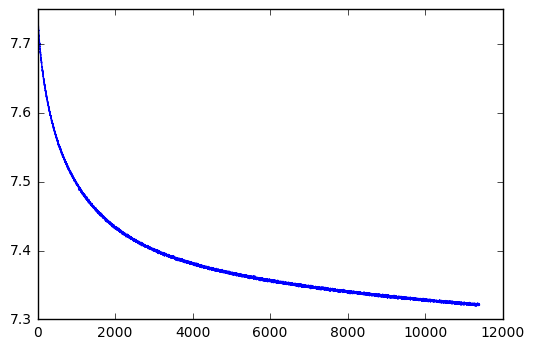

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt_dat = np.genfromtxt('params_2000/ae_train/cost_profile.csv', delimiter=',', names = True)
plt.plot(plt_dat)
plt.show()